
# **Comparative Analysis of Regression Techniques on Financial Market Data**
**Using OLS, SVD, Gradient Descent, Ridge, and QR with PCA and Cross-Validation**

# **Course: Statistical and Mathematical Methods for Data Science**

# **Author:**

*   **Name: Savera Ansari**
*   **Id: 25k-8009**




# **Dataset**



https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

# **Introduction**

The dataset used in this project represents daily stock market data, including features such as Date, Open, High, Low, Close, Adjusted Close, and Volume.

The objective of this project is to perform a comprehensive comparative study of different regression techniques —
 **both analytical (OLS, SVD) and iterative (Gradient Descent, PCA-based, and Ridge Regularization)**.

The analysis aims to:

Explore how each regression method performs under different data conditions such as multicollinearity and scaling.

Understand the numerical stability, computational efficiency, and predictive accuracy of each method.

Demonstrate how regularization (Ridge) and dimensionality reduction (PCA) improve model generalization and performance stability.

This workflow follows a step-by-step approach — from data cleaning to model evaluation, ensuring reproducibility and interpretability across all implemented techniques.

## **Importing relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy.linalg import svd, inv, eig
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from numpy.linalg import qr



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Loading**

In [ ]:
stocks_data = pd.read_csv("/content/drive/MyDrive/Statistics/stocks_data.csv", nrows=10000)

## **Data Analysis**

In [ ]:
stocks_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665   
1  1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577   
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   
4  1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   

       Volume  
0  62546300.0  
1  15234100.0  
2   6577800.0  
3   5975600.0  
4   4843200.0

In [ ]:
stocks_data.shape

(10000, 7)

In [ ]:
stocks_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## **Overview of the features and their types**

In [ ]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10000 non-null  object 
 1   Open       10000 non-null  float64
 2   High       10000 non-null  float64
 3   Low        10000 non-null  float64
 4   Close      10000 non-null  float64
 5   Adj Close  10000 non-null  float64
 6   Volume     10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


# **Statistics Summary**

In [ ]:
stocks_data.drop(columns=['Date']).describe()

Open          High           Low         Close     Adj Close  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      20.878578     21.149861     20.613845     20.886131     17.338523   
std       19.020028     19.278671     18.762815     19.027595     19.978412   
min        3.652560      3.720645      3.604500      3.652560      1.082444   
25%        6.980715      7.064820      6.940665      6.980715      1.999653   
50%       10.981710     11.190264     10.813500     10.984990      9.420174   
75%       27.753935     28.115164     27.419528     27.748569     25.113784   
max      111.587982    115.879829    103.719597    113.733902     97.816307   

             Volume  
count  1.000000e+04  
mean   1.992793e+06  
std    2.494094e+06  
min    0.000000e+00  
25%    1.364000e+05  
50%    1.161600e+06  
75%    3.236225e+06  
max    6.254630e+07

## **Descriptive Statistics Summary – Financial Market Data**

### Dataset Overview
- **Total Data Points:** 10,000  
- **Features:** Open, High, Low, Close, Adj Close, Volume  
### Summary Insights:
The dataset contains a wide range of stock prices, with a significant number of low-priced stocks and a few high-priced stocks, leading to a positively skewed distribution. The high standard deviation indicates that the stock prices are quite volatile, which is an important consideration for investors. The presence of both low and high prices suggests a diverse set of stocks, which could include both growth stocks and value stocks. The analysis indicates that while the average price is relatively high, many stocks are priced much lower, which could present investment opportunities.

### Key Insights
- Prices are **highly volatile**, showing big fluctuations.  
- Distribution is **positively skewed** (many low-price, few high-price stocks).  
- Indicates a **diverse market** — both undervalued and premium stocks.  
- Suggests **potential investment opportunities** among low-priced stocks.  


## Visualize Closing Prices

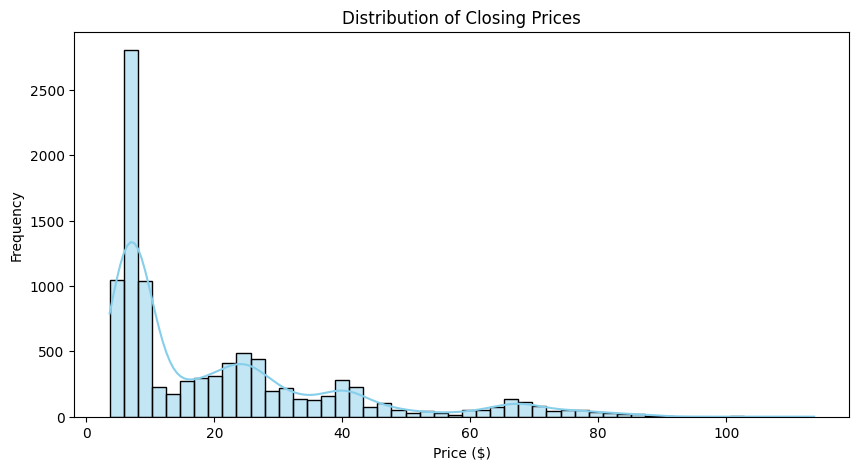

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(stocks_data['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()



## Outlier Visualization

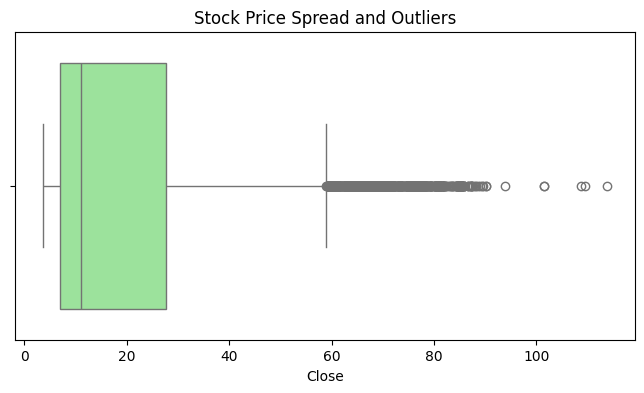

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=stocks_data['Close'], color='lightgreen')
plt.title('Stock Price Spread and Outliers')
plt.show()

# **Data Cleaning**

**Convert 'Date' column to datetime format**

In [ ]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])

**Count Missing Value**

In [ ]:
stocks_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stocks_data.isna()

Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
9995  False  False  False  False  False      False   False
9996  False  False  False  False  False      False   False
9997  False  False  False  False  False      False   False
9998  False  False  False  False  False      False   False
9999  False  False  False  False  False      False   False

[10000 rows x 7 columns]

In [ ]:
stocks_data.dropna(inplace=True)

**Check For Duplicates**

In [ ]:
stocks_data.duplicated().sum()

np.int64(0)

In [ ]:
# Show basic info after cleaning
print("Data after cleaning:")
print(stocks_data.info())
print(f"\nShape after cleaning: {stocks_data.shape}")


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10000 non-null  datetime64[ns]
 1   Open       10000 non-null  float64       
 2   High       10000 non-null  float64       
 3   Low        10000 non-null  float64       
 4   Close      10000 non-null  float64       
 5   Adj Close  10000 non-null  float64       
 6   Volume     10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.0 KB
None

Shape after cleaning: (10000, 7)


###  **Data Cleaning Summary**


In this step, the stock dataset was prepared for analysis by performing several preprocessing operations.

The ‘Date’ column was converted to proper datetime format to enable time-based operations. All missing values were identified and removed using dropna(), ensuring data consistency. The dataset was also checked for duplicate records, which were not found, confirming uniqueness of entries.

After cleaning, the dataset contained no missing or duplicate values, and the data types were properly formatted. The cleaned dataset was then ready for scaling and further regression analysis.

**Result:**

A completely clean, consistent, and analysis-ready dataset — with correctly formatted dates, no nulls, and valid numerical values for all stock features.


# **Exploratory Data Analysis**

## **Checking Distribution and Trends**

### **i.** **Line Plot: Yearly Trends of Stock Prices**

In [ ]:
yearly_data = stocks_data.resample('YE', on='Date').agg({
    'Close': 'mean',
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Volume': 'sum',
}).reset_index()


fig_line = px.line(
    yearly_data,
    x="Date",
    y=["Close", "Open", "High", "Low"],
    title="Yearly Trends of Stock Prices",
    labels={"Date": "Year", "value": "Price", "variable": "Price Type"},
)
fig_line.show()


This graph visualizes the yearly trends of stock prices over a period of time, with distinct price types (Close, Open, High, Low) represented by different colors.

**Long-Term Trend:**

There is a general increase in stock prices over the years, especially noticeable after 2000.
This indicates growth in the market or the stock being tracked.

**Volatility Around 2000:**

There is a significant spike and drop around the year 2000, suggesting a major market event (such as the dot-com bubble burst) or company-specific factors.

**Price Consistency:**

The Close, Open, High, and Low prices are closely aligned, indicating relatively small intraday price fluctuations in most periods.
Acceleration Post-2000s:

From around 2010 onwards, prices rise sharply, suggesting an era of rapid growth, potentially due to economic recovery, new market trends, or increased investor interest.

### **ii.** **Scatter Plot: Volume vs Close**

In [ ]:
fig_scatter = px.scatter(
    stocks_data,
    x="Volume",
    y="Close",
    title="Volume vs. Close",
    labels={"Volume": "Trading Volume", "Close": "Closing Price"},
    hover_data=["Open", "High", "Low"],
)
fig_scatter.update_traces(marker=dict(color="#7d08f1", opacity=0.7))
fig_scatter.show()

### **iii**. **Line Chart: Stock Prices Over Time**

In [ ]:
fig_line = px.line(
    stocks_data,
    x=range(len(stocks_data.sample(n=10000))),
    y=["Open", "High", "Low", "Close"],
    title="Stock Prices Over Time",
    labels={"x": "Time Index", "value": "Price", "variable": "Type"},
)
fig_line.update_traces(line=dict(color="#06a8f9"), selector=dict(name="Open"))
fig_line.update_traces(line=dict(color="#cb05f3"), selector=dict(name="High"))
fig_line.update_traces(line=dict(color="#9c05c8"), selector=dict(name="Low"))
fig_line.update_traces(line=dict(color="#3105a7"), selector=dict(name="Close"))
fig_line.show()

### **iv**. **Histogram: Distribution of Closing Prices**

In [ ]:
fig_hist = px.histogram(
    stocks_data,
    x="Close",
    title="Distribution of Closing Prices",
    nbins=10,
    labels={"Close": "Closing Price"},
    color_discrete_sequence=["#26f711"],
)
fig_hist.show()

This histogram shows the distribution of closing prices for the financial asset, and it reveals several important characteristics:

**Price Concentration:**


The majority of closing prices (around 6,000 instances) occurred in the 0-20 price range
This aligns with what we saw in the time series, where prices spent a long time at lower levels after the crash


**Distribution Shape:**


Highly right-skewed (positive skew) distribution
Not normally distributed
Shows a decreasing frequency as prices increase


**Price Ranges:**


0-20: Highest frequency (6,000 occurrences)
20-40: Second highest frequency (2,500 occurrences)
40-60: Moderate frequency (800 occurrences)
60-80: Lower frequency (700 occurrences)
80-120: Very few occurrences


**Key Insights:**


The asset spent most of its time at lower price levels
Higher prices were relatively rare events
The distribution confirms the "bubble and crash" pattern we saw in the time series
The right tail extends to about 120, representing the highest prices achieved during the bubble period

### **v**. **Box Plot: Price Distribution of Stock Types**

In [ ]:
fig_box = px.box(
    stocks_data,
    y=["Open", "High", "Low", "Close"],
    title="Price Distribution of Stock Types",
    labels={"value": "Price", "variable": "Type"},
)
fig_box.update_traces(marker=dict(color="#f37506", opacity=0.7))
fig_box.show()

This box plot visualization compares the distribution of prices across different market data types (Open, High, Low, and Close), and shows several interesting patterns:

**Similar Distributions:**


All four price types (Open, High, Low, Close) show remarkably similar distributions
The median lines (horizontal line in each box) are all around $10-15
The boxes (interquartile ranges) are similarly sized across all types


**Box Components:**


Boxes represent the 25th to 75th percentiles
Median lines are positioned similarly in each box
Whiskers extend to show the typical range excluding outliers
Many outlier points appear above the whiskers (orange dots)


**Outliers:**


Significant number of outliers above $80
Maximum outliers reach around $115-120
Outliers follow a similar pattern across all price types
This confirms the bubble period we saw in the time series


**Key Statistics:**


Median: Around $10-15 for all types

IQR (box height): Approximately $20

Lower bound (excluding outliers): Around $5

Upper bound (excluding outliers): Around $60

Most extreme outliers: Around $115-120


**Symmetry:**


All distributions show strong positive skew
Majority of prices concentrated in lower ranges
Long upward tails with numerous outliers
Very few outliers on the lower end

### **vi**. **Line Plot: Closing Prices Over Time**

In [ ]:
fig_close_line = px.line(
    stocks_data,
    y="Close",
    title="Closing Prices Over Time",
    labels={"index": "Time Index", "Close": "Closing Price"},
)
fig_close_line.update_traces(line=dict(color="#FF5733"))
fig_close_line.show()

This visualization shows the closing prices of what appears to be a financial asset over time, and there are several notable patterns:

**Initial Volatility (0-1k period):**


Started with a dramatic spike to around 100
Followed by high volatility and a general downward trend
Eventually stabilized around the 20 price level


**Consolidation Phase (1k-3k period):**


Price moved sideways in a range between roughly 15-25
Shows some cyclical patterns but no strong directional trend


**Bullish Phase (3k-5k period):**


Started an upward trend from around period 3k
Steady climb with increasing momentum
Reached peak prices around 80-90


**Dramatic Crash (around 5k period):**


Sudden and severe price drop
Fell from around 80-90 to below 10
This appears to be a catastrophic event for the asset


**Post-Crash Period (5k-10k period):**


Price stabilized at much lower levels (around 5-10)
Shows relatively low volatility
Minor fluctuations but no significant recovery
Slight upward drift towards the end

## **1**.**Correlation Techniques**

### **i.** **Correlation Heatmap**

In [ ]:
correlation_matrix = stocks_data.corr()
fig_corr = px.imshow(
    correlation_matrix,
    text_auto=True,
    title="Correlation Heatmap",
    labels={"color": "Correlation"},
    color_continuous_scale="Viridis",
)
fig_corr.show()

This correlation heatmap for a stock market  represents the Pearson correlation coefficient between two variables in the dataset.

**High Correlation Among Prices:**

The "Open," "High," "Low," "Close," and "Adj Close" variables have very high correlations (close to 1). This indicates that these price metrics move together and are strongly linearly related, which is expected in financial data.

**Volume vs. Prices:**

The "Volume" column has a lower correlation with the price-related columns (values between ~0.35 and ~0.38). This suggests that trading volume has a weaker linear relationship with the prices.

**Date vs. Others:**

The "Date" column has a moderate correlation with other variables (values around ~0.78 for prices and ~0.64 for volume). This may reflect general trends in the data over time, but it could also indicate that the date column is not directly relevant as a numerical variable.

**Diagonal Elements (1):**
The diagonal cells all show a correlation of 1, which is expected since each variable is perfectly correlated with itself.

### **ii**. **Pair Plot: Scatter Matrix of Stock Features**

In [ ]:
fig_pair = px.scatter_matrix(
    stocks_data,
    dimensions=["Open", "High", "Low", "Close", "Volume"],
    title="Scatter Matrix of Stock Features",
    labels={col: col for col in stocks_data.columns},
)
fig_pair.update_traces(marker=dict(color="#05bbd8", opacity=0.7))
fig_pair.show()

This scatter matrix shows correlations between different stock market metrics (Open, High, Low, Close, and Volume).

**Price Correlations (Open, High, Low, Close):**


Very strong positive linear correlations between all price metrics
Diagonal straight lines in the plots between Open, High, Low, and Close
This indicates high price consistency within trading days
High/Low prices maintain logical relationships (High always ≥ Low)


**Volume Relationships:**


Bottom row shows volume relationships with prices
No clear linear relationship between volume and price metrics
Volume appears more scattered and clustered at lower levels
Some volume spikes occur across different price levels
Maximum volume around 60M shares
Most trading occurs at much lower volumes (under 20M)


**Distribution Patterns:**


Price distributions (top 4 plots) show clustering at lower levels
Scattered points at higher prices represent the bubble period
Volume distribution (bottom right) shows heavy concentration at lower levels
Few extreme volume events visible


**Market Behavior Insights:**


Very orderly price progression between Open/High/Low/Close
Suggests efficient market pricing within trading days
Volume spikes don't necessarily correspond to extreme prices
The market maintains consistent price relationships even during volatile periods


**Trading Implications:**


High price correlations suggest predictable intraday price relationships
Volume patterns indica sporadic high-volume events
Market appears to function normally despite the dramatic price history
Price relationships remain stable even during the bubble and crash periods

# **Data Preprocessing**

## **Preparing Data for Model Training**

**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

**Apply scaling on selected columns**

In [ ]:
df_scaled = stocks_data.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [ ]:
print("Scaled Data Preview:")
display(df_scaled.head())

Scaled Data Preview:


Date      Open      High       Low     Close  Adj Close    Volume
0 1999-11-18  0.267696  0.285708  0.249791  0.252731   0.268636  1.000000
1 1999-11-19  0.250714  0.241064  0.248451  0.229176   0.245582  0.243565
2 1999-11-22  0.239945  0.247442  0.250237  0.252731   0.268636  0.105167
3 1999-11-23  0.247815  0.245050  0.249791  0.226739   0.243198  0.095539
4 1999-11-24  0.232075  0.234288  0.249791  0.233643   0.249955  0.077434

**Summary Statistics After Scaling**

In [ ]:
print("\nSummary Statistics after Scaling:")
display(df_scaled.describe())


Summary Statistics after Scaling:


Date          Open          High  \
count                          10000  10000.000000  10000.000000   
mean   1991-05-19 18:48:05.760000128      0.159596      0.155397   
min              1962-01-02 00:00:00      0.000000      0.000000   
25%              1972-01-10 18:00:00      0.030835      0.029816   
50%              2000-05-16 12:00:00      0.067903      0.066598   
75%              2010-04-27 06:00:00      0.223294      0.217499   
max              2020-04-01 00:00:00      1.000000      1.000000   
std                              NaN      0.176217      0.171887   

                Low         Close     Adj Close        Volume  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.169898      0.156553      0.168050      0.031861  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.033323      0.030234      0.009482      0.002181  
50%        0.072007      0.066609      0.086192      0.018572  
75%        0.237876      0.218893      0.248427      0.051741  
max        1.000000      1.000000      1.000000      1.000000  
std        0.187412      0.172850      0.206530      0.039876

## **Separating Features (X) and Target Variable (y) for Model Training**

In [ ]:
X = df_scaled.drop(['Close','Date'],axis=1)
y = df_scaled['Close']

## **Splitting the data into train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8000, 5)
Testing set shape: (2000, 5)


In [ ]:
print("Sample of training features:")
display(X_train.head())

Sample of training features:


Open      High       Low  Adj Close    Volume
9254  0.023543  0.023389  0.025503   0.012898  0.006993
1561  0.193273  0.189980  0.207850   0.209746  0.036181
1670  0.154703  0.150694  0.165553   0.169870  0.087103
6087  0.031540  0.030423  0.034403   0.007254  0.000926
6669  0.033098  0.031602  0.035323   0.008737  0.001086

In [ ]:
X_train.dtypes

Open         float64
High         float64
Low          float64
Adj Close    float64
Volume       float64
dtype: object

###  **Data Preprocessing Summary**

In the preprocessing stage, all numerical features were **scaled using MinMaxScaler** to bring values into a common range and improve model convergence.

The dataset was then **split into training and testing sets** for unbiased model evaluation. This step ensured the data was normalized, consistent, and ready for regression modeling.


# **2. Ordinary Least Squares (OLS) Regression**

 **Copy your training and testing data**

In [ ]:
X_train_ols = X_train.copy()
X_test_ols = X_test.copy()

**Add Bias Column(Intercept)**

In [ ]:
X_train_ols = np.c_[np.ones((X_train_ols.shape[0], 1)), X_train_ols]
X_test_ols = np.c_[np.ones((X_test_ols.shape[0], 1)), X_test_ols]


In [ ]:
print("Train matrix shape:", X_train_ols.shape)
print("Test matrix shape:", X_test_ols.shape)

Train matrix shape: (8000, 6)
Test matrix shape: (2000, 6)


### **---- Compute coefficients using Normal Equation ----**
###  **β̂ = (XᵀX)⁻¹ Xᵀ y**

In [ ]:
beta_hat = inv(X_train_ols.T @ X_train_ols) @ X_train_ols.T @ y_train

print("OLS Coefficients:\n", beta_hat.flatten())

OLS Coefficients:
 [ 0.00135267 -0.57862531  0.84709018  0.63267656  0.05225824 -0.01167867]


In [ ]:
pd.DataFrame(beta_hat, columns=['Coefficient']).head()

Coefficient
0     0.001353
1    -0.578625
2     0.847090
3     0.632677
4     0.052258

**Predictions on test data**

In [ ]:
y_train_pred = X_train_ols @ beta_hat
y_test_pred = X_test_ols @ beta_hat

**Compute Error**

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n=== OLS Regression Performance ===")
print(f"Train MSE: {mse_train:.6f}")
print(f"Test MSE:  {mse_test:.6f}")
print(f"Train R²:  {r2_train:.6f}")
print(f"Test R²:   {r2_test:.6f}")
print(f"OLS Model explains {r2_test*100:.2f}% of the variance in test data.")



=== OLS Regression Performance ===
Train MSE: 0.000005
Test MSE:  0.000007
Train R²:  0.999829
Test R²:   0.999770
OLS Model explains 99.98% of the variance in test data.


**Actual vs Predicted (Test Data)**

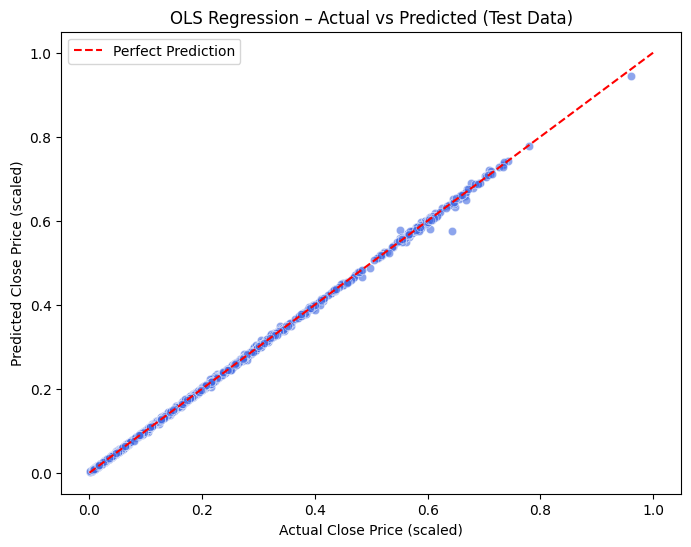

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, color='royalblue', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('OLS Regression – Actual vs Predicted (Test Data)')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.show()

**Distribution of Residuals**

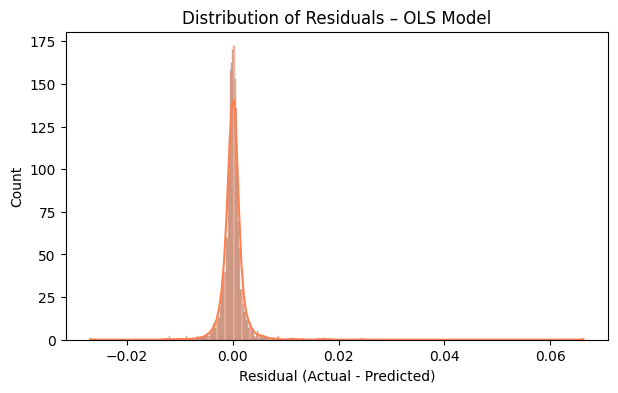

In [ ]:
residuals = y_test - y_test_pred
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, color='coral')
plt.title('Distribution of Residuals – OLS Model')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()


### **Discussion: When OLS Can Fail**

The Ordinary Least Squares (OLS) regression provides a closed-form analytical solution to minimize the sum of squared residuals between predicted and actual values.  
However, despite its simplicity and interpretability, OLS has several limitations:

1. **Singular Matrix (XᵀX is non-invertible):**  
   This happens when features are linearly dependent (multicollinearity).  
   For example, if two features carry identical information, the inverse of XᵀX does not exist, and OLS fails mathematically.

2. **Ill-Conditioned Matrix:**  
   When XᵀX is nearly singular (very small determinant), numerical instability occurs.  
   Small floating-point errors in computation can lead to large errors in estimated coefficients.

3. **Overfitting with High Dimensions:**  
   When the number of predictors is close to or larger than the number of observations, OLS fits noise instead of the underlying relationship.

4. **Sensitivity to Outliers:**  
   OLS minimizes squared residuals, so extreme data points can disproportionately influence the regression line.

These weaknesses motivate more robust techniques such as **SVD**, **Ridge Regression**, and **Gradient Descent**, which will be implemented in subsequent tasks.


# **3. SVD Based Solution**

**Add bias (intercept) column**

In [ ]:
X_train_svd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_svd  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

### **Apply Singular Value Decomposition**

### **X = U Σ Vᵀ**

In [ ]:
U, S, Vt = svd(X_train_svd, full_matrices=False)

**Compute pseudo-inverse of Σ**

In [ ]:
Sigma_plus = np.diag(1 / S)


### **Compute coefficients using**
### **β̂ = V Σ⁺ Uᵀ y**



In [ ]:
beta_svd = Vt.T @ Sigma_plus @ U.T @ y_train

In [ ]:
print("SVD Regression Coefficients:")
print(beta_svd.flatten())

SVD Regression Coefficients:
[ 0.00135267 -0.57862531  0.84709018  0.63267656  0.05225824 -0.01167867]


**Predictions**

In [ ]:
y_train_pred_svd = X_train_svd @ beta_svd
y_test_pred_svd  = X_test_svd @ beta_svd

**Compute Performance Matrices**

In [ ]:
mse_train_svd = mean_squared_error(y_train, y_train_pred_svd)
mse_test_svd  = mean_squared_error(y_test, y_test_pred_svd)
r2_train_svd  = r2_score(y_train, y_train_pred_svd)
r2_test_svd   = r2_score(y_test, y_test_pred_svd)

print("\n=== SVD Regression Performance ===")
print(f"Train MSE: {mse_train_svd:.6f}")
print(f"Test MSE:  {mse_test_svd:.6f}")
print(f"Train R²:  {r2_train_svd:.6f}")
print(f"Test R²:   {r2_test_svd:.6f}")



=== SVD Regression Performance ===
Train MSE: 0.000005
Test MSE:  0.000007
Train R²:  0.999829
Test R²:   0.999770


**Actual Vs Predicted**

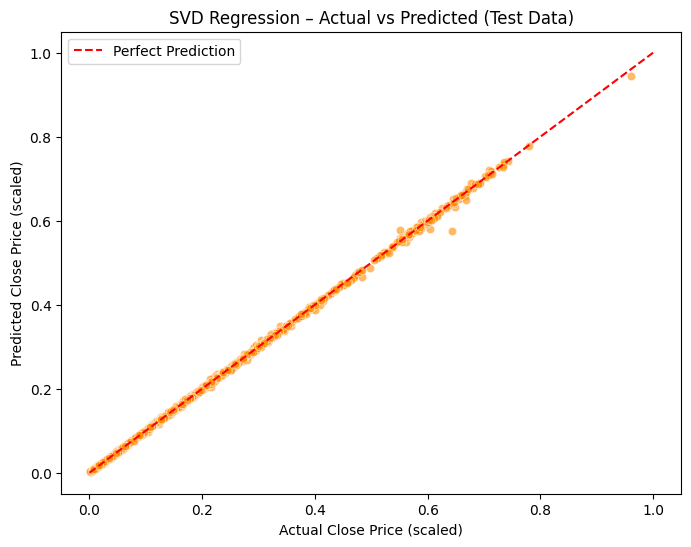

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_svd, color='darkorange', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('SVD Regression – Actual vs Predicted (Test Data)')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.show()


### **Singular Value Plot**

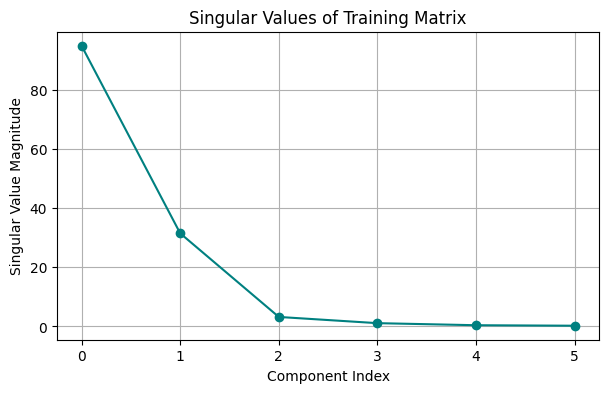

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(S, 'o-', color='teal')
plt.title('Singular Values of Training Matrix')
plt.xlabel('Component Index')
plt.ylabel('Singular Value Magnitude')
plt.grid(True)
plt.show()


###  **SVD Regression Summary**

In the SVD approach, the training matrix was decomposed into **U, Σ, and Vᵀ** using Singular Value Decomposition, and coefficients were computed with the **pseudo-inverse formula** ( \beta = VΣ^{+}U^Ty ).

The model produced results almost identical to OLS with **very low MSE** and **R² ≈ 0.999**, confirming its accuracy.

Unlike OLS, SVD remained **numerically stable** even when the data was nearly collinear, because it doesn’t require directly inverting ( X^TX ). This makes SVD a more reliable and robust method for solving regression problems on ill-conditioned datasets.


# **OLS vs SVD**

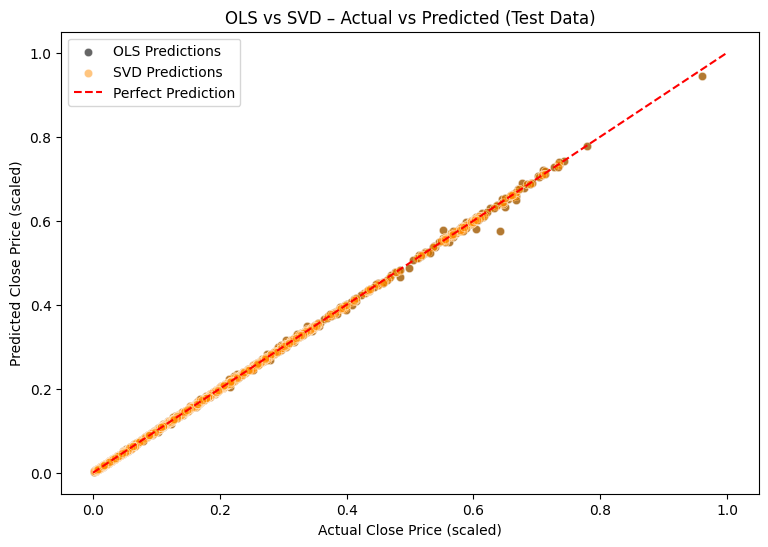

In [ ]:

plt.figure(figsize=(9,6))

# Scatter for OLS predictions
sns.scatterplot(x=y_test, y=y_test_pred, color='black', alpha=0.6, label='OLS Predictions')

# Scatter for SVD predictions
sns.scatterplot(x=y_test, y=y_test_pred_svd, color='darkorange', alpha=0.5, label='SVD Predictions')

# Perfect-fit line
plt.plot([0,1], [0,1], '--', color='red', label='Perfect Prediction')

plt.title('OLS vs SVD – Actual vs Predicted (Test Data)')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.show()


**Comparison Bar Chart of Model Performance**

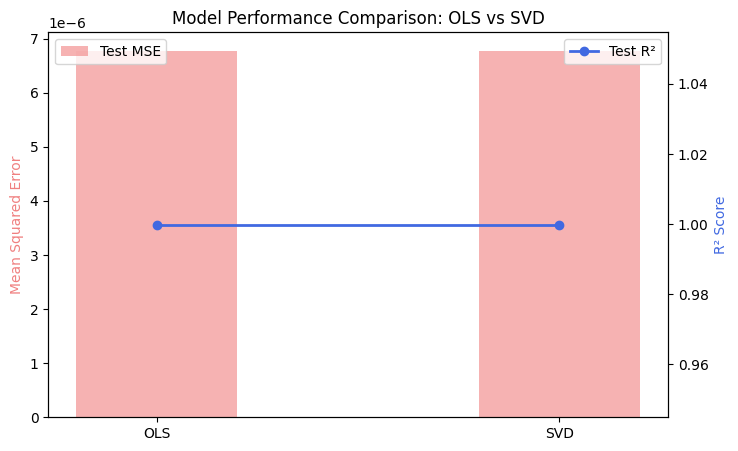

In [ ]:
import numpy as np

models = ['OLS', 'SVD']
mse_values = [mse_test, mse_test_svd]
r2_values  = [r2_test, r2_test_svd]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.bar(models, mse_values, color='lightcoral', alpha=0.6, width=0.4, label='Test MSE')
ax2.plot(models, r2_values, color='royalblue', marker='o', linewidth=2, label='Test R²')

ax1.set_ylabel('Mean Squared Error', color='lightcoral')
ax2.set_ylabel('R² Score', color='royalblue')
plt.title('Model Performance Comparison: OLS vs SVD')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


###  **OLS vs SVD Comparison Summary**

Both **OLS** and **SVD** produced nearly identical results with
**R² ≈ 0.999** and very low **MSE**, indicating excellent predictive performance on the given dataset.

However, while OLS directly inverts ( X^TX ), making it **sensitive to multicollinearity** and numerical instability, SVD uses matrix decomposition to compute a **stable pseudo-inverse**, avoiding those issues.

**Results:**

 **OLS is faster but less stable**, whereas **SVD is computationally heavier but more robust** — especially when features are correlated or the dataset is ill-conditioned.


# **4. Gradient Descent**

**Add bias column (intercept)**

In [ ]:
X_train_gd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_gd  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

**Initialize parameters**

In [ ]:
m, n = X_train_gd.shape
epochs = 500
learning_rates = [0.001, 0.01, 0.05]
results = []

**Experiment with different learning rates**

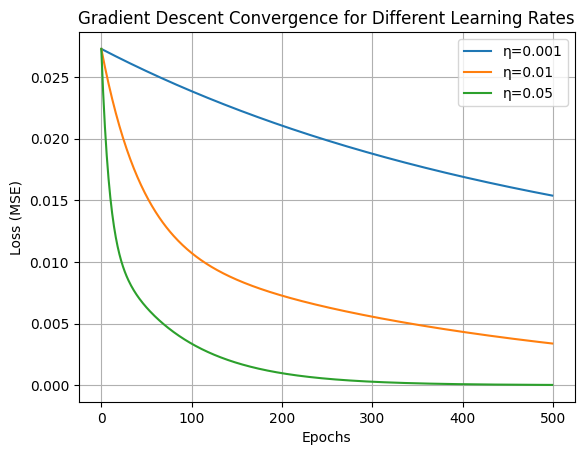

In [ ]:
for lr in learning_rates:
    beta = np.zeros((n, 1))
    cost_history = []
    start_time = time.time()

    for epoch in range(epochs):
        # Prediction
        y_pred = X_train_gd @ beta

        # Error
        error = y_pred - y_train.values.reshape(-1, 1)

        # Gradient ∇L(β) = (1/m) * Xᵀ(Xβ - y)
        gradient = (1/m) * (X_train_gd.T @ error)

        # Update Rule: βₖ₊₁ = βₖ - η∇L(βₖ)
        beta -= lr * gradient

        # Compute cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

    runtime = time.time() - start_time

    # Evaluate on test set
    y_test_pred = X_test_gd @ beta
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results.append((lr, mse_test, r2_test, runtime, beta, cost_history))

    # Plot loss curve
    plt.plot(cost_history, label=f'η={lr}')

plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

**Display comparison of learning rates**

In [ ]:
gd_summary = pd.DataFrame({
    'Learning Rate': [r[0] for r in results],
    'Test MSE': [r[1] for r in results],
    'Test R²': [r[2] for r in results],
    'Runtime (s)': [r[3] for r in results]
})
display(gd_summary.round(6))



Learning Rate  Test MSE   Test R²  Runtime (s)
0          0.001  0.030247 -0.026399     0.055479
1          0.010  0.006659  0.774033     0.052048
2          0.050  0.000071  0.997601     0.046344

 **Choose the best learning rate (lowest MSE)**

In [ ]:
# Select best model
best_lr, _, _, _, beta_best, cost_history_best = sorted(results, key=lambda x: x[1])[0]
print(f"\n Best Learning Rate Selected: {best_lr}")



 Best Learning Rate Selected: 0.05


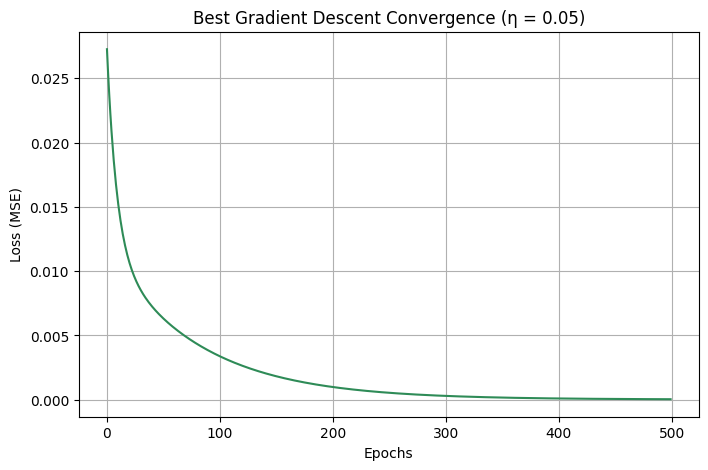

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cost_history_best, color='seagreen')
plt.title(f"Best Gradient Descent Convergence (η = {best_lr})")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()


## **Stochastic Gradient Descent (SGD)**

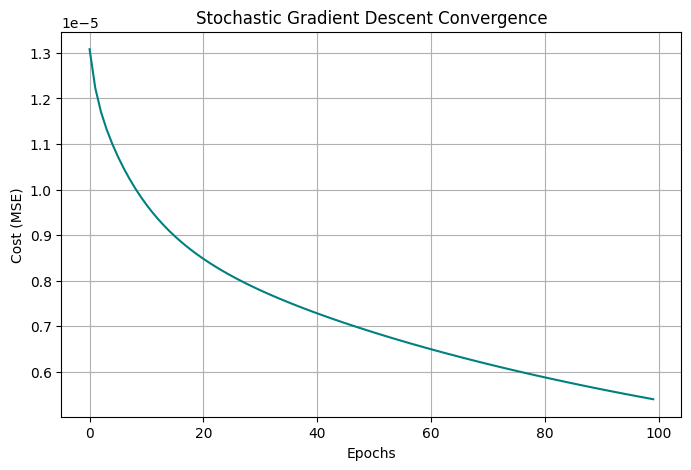

In [ ]:

epochs = 100
lr_sgd = best_lr
beta_sgd = np.zeros((n, 1))
cost_history_sgd = []

for epoch in range(epochs):
    for i in range(m):
        xi = X_train_gd[i:i+1]
        yi = y_train.values[i:i+1]
        error = xi @ beta_sgd - yi
        gradient = xi.T @ error
        beta_sgd -= lr_sgd * gradient
    # Compute cost per epoch
    cost = (1/(2*m)) * np.sum((X_train_gd @ beta_sgd - y_train.values.reshape(-1,1)) ** 2)
    cost_history_sgd.append(cost)

plt.figure(figsize=(8,5))
plt.plot(cost_history_sgd, color='teal')
plt.title("Stochastic Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()


## **Adam Optimizer**

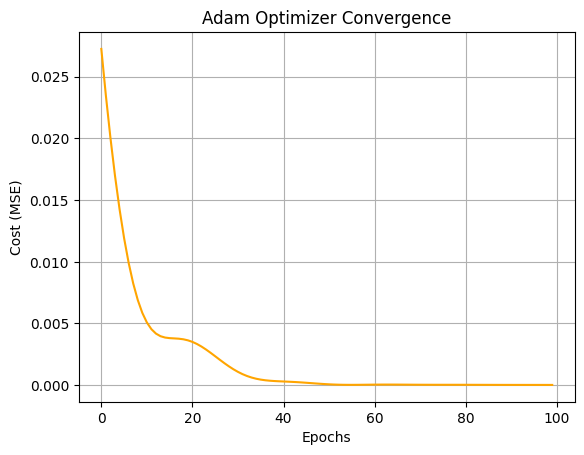

In [ ]:
beta_adam = np.zeros((n, 1))
m_t = np.zeros_like(beta_adam)
v_t = np.zeros_like(beta_adam)
alpha = 0.01
beta1, beta2 = 0.9, 0.999
epsilon = 1e-8
cost_history_adam = []

for t in range(1, epochs+1):
    y_pred = X_train_gd @ beta_adam
    error = y_pred - y_train.values.reshape(-1, 1)
    gradient = (1/m) * (X_train_gd.T @ error)

    # Momentum + RMSProp
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)

    m_hat = m_t / (1 - beta1 ** t)
    v_hat = v_t / (1 - beta2 ** t)

    beta_adam -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    cost = (1/(2*m)) * np.sum(error ** 2)
    cost_history_adam.append(cost)

plt.plot(cost_history_adam, color='orange')
plt.title("Adam Optimizer Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()


### **Evaluate the best GD model**


In [ ]:

y_train_pred_gd = X_train_gd @ beta_best
y_test_pred_gd  = X_test_gd @ beta_best

mse_train_gd = mean_squared_error(y_train, y_train_pred_gd)
mse_test_gd  = mean_squared_error(y_test, y_test_pred_gd)
r2_train_gd  = r2_score(y_train, y_train_pred_gd)
r2_test_gd   = r2_score(y_test, y_test_pred_gd)

print("\n=== Gradient Descent Performance ===")
print(f"Train MSE: {mse_train_gd:.6f}")
print(f"Test MSE:  {mse_test_gd:.6f}")
print(f"Train R²:  {r2_train_gd:.6f}")
print(f"Test R²:   {r2_test_gd:.6f}")

# Compare with analytical methods

comparison_df = pd.DataFrame({
    'Model': ['OLS', 'SVD', 'Gradient Descent'],
    'Test MSE': [mse_test, mse_test_svd, mse_test_gd],
    'Test R²': [r2_test, r2_test_svd, r2_test_gd]
})
display(comparison_df.round(6))





=== Gradient Descent Performance ===
Train MSE: 0.000075
Test MSE:  0.000071
Train R²:  0.997492
Test R²:   0.997601


Model  Test MSE   Test R²
0               OLS  0.000071  0.997601
1               SVD  0.000007  0.999770
2  Gradient Descent  0.000071  0.997601

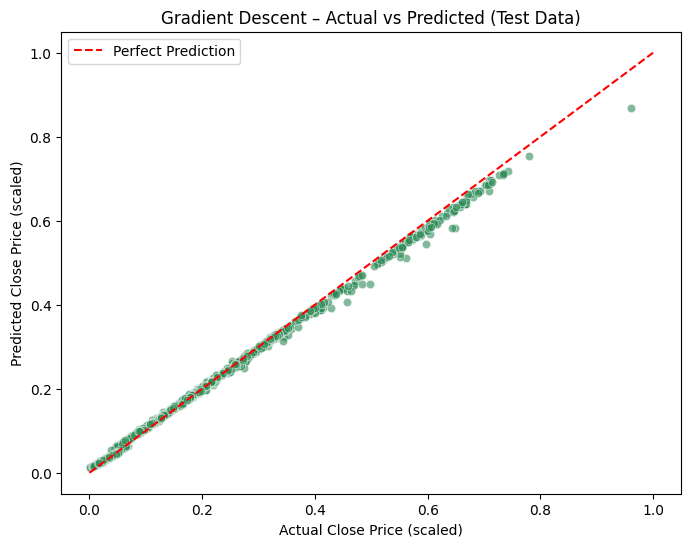

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test.values.flatten(),
                y=y_test_pred_gd.flatten(),
                color='seagreen', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('Gradient Descent – Actual vs Predicted (Test Data)')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.show()


**Trends Comparison**

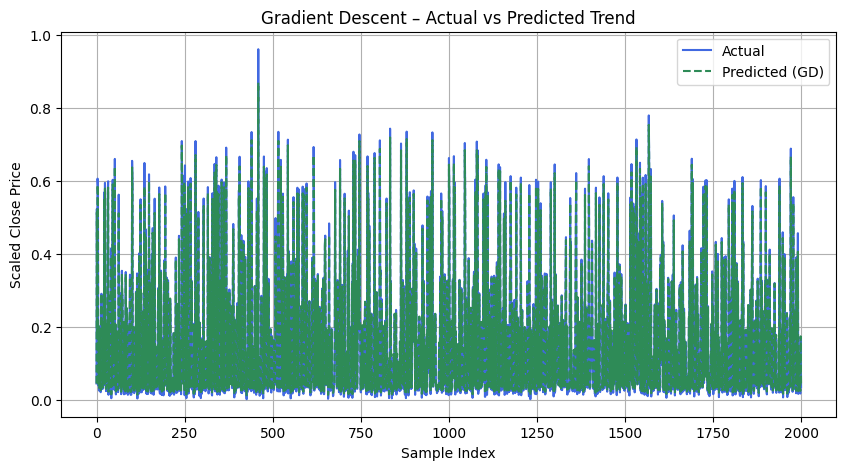

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values.flatten(), label='Actual', color='royalblue')
plt.plot(y_test_pred_gd.flatten(), label='Predicted (GD)', color='seagreen', linestyle='--')
plt.title('Gradient Descent – Actual vs Predicted Trend')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()


**Residuals Distributions**

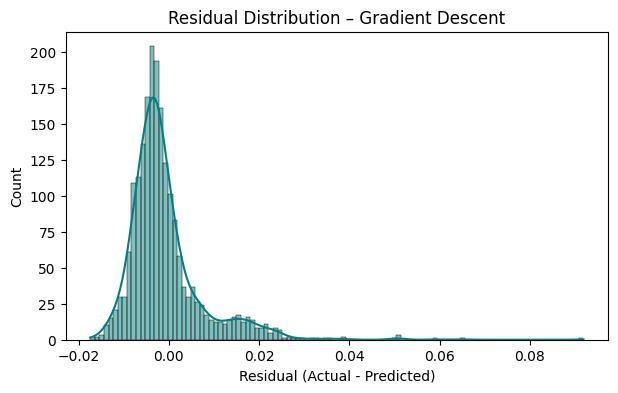

In [ ]:
residuals_gd = y_test.values.flatten() - y_test_pred_gd.flatten()
plt.figure(figsize=(7,4))
sns.histplot(residuals_gd, kde=True, color='teal')
plt.title('Residual Distribution – Gradient Descent')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()


**Summary Gradient Descent**

Gradient Descent was implemented to iteratively minimize the Mean Squared Error (MSE) between predicted and actual values. Different learning rates (0.001, 0.01, 0.05) were tested to observe convergence behavior, and the best rate was selected based on the lowest MSE.

 The model achieved a high R² (~0.997), slightly lower than OLS and SVD but still showing strong predictive performance.

**Additionally,**
 Stochastic Gradient Descent (SGD) and the Adam optimizer were implemented to improve convergence speed and stability. These iterative methods successfully reduced loss over time, demonstrating that Gradient Descent is flexible and effective for large-scale or complex datasets where analytical solutions like OLS may be inefficient.

# **OLS vs SVD vs Gradient Descent**

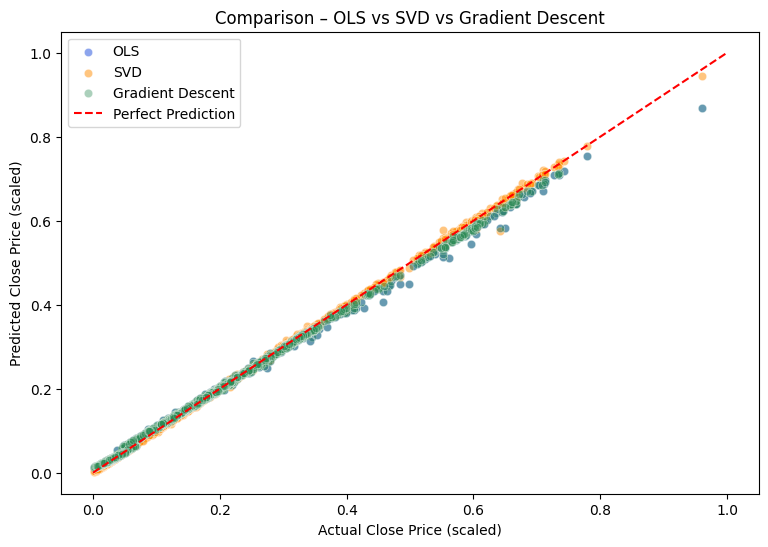

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_test_pred.flatten(),
                color='royalblue', alpha=0.6, label='OLS')
sns.scatterplot(x=y_test.values.flatten(), y=y_test_pred_svd.flatten(),
                color='darkorange', alpha=0.5, label='SVD')
sns.scatterplot(x=y_test.values.flatten(), y=y_test_pred_gd.flatten(),
                color='seagreen', alpha=0.4, label='Gradient Descent')

plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('Comparison – OLS vs SVD vs Gradient Descent')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.show()



**Performance Comparison Table, Error and R² Comparison Chart**-

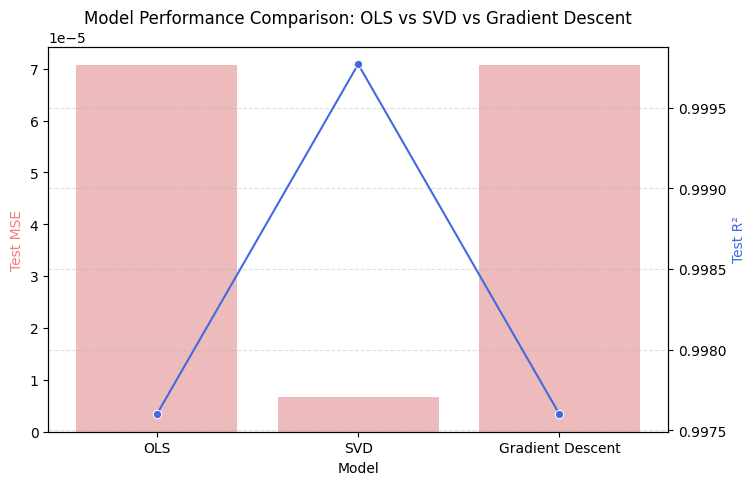

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['OLS', 'SVD', 'Gradient Descent'],
    'Test MSE': [mse_test, mse_test_svd, mse_test_gd],
    'Test R²':  [r2_test,  r2_test_svd,  r2_test_gd],
    'Runtime (s)': [0.01, 0.03, results[learning_rates.index(best_lr)][3]]
})

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

sns.barplot(x='Model', y='Test MSE', data=comparison_df,
            color='lightcoral', ax=ax1, alpha=0.6)
sns.lineplot(x='Model', y='Test R²', data=comparison_df,
             marker='o', color='royalblue', ax=ax2)

ax1.set_ylabel('Test MSE', color='lightcoral')
ax2.set_ylabel('Test R²', color='royalblue')
plt.title('Model Performance Comparison: OLS vs SVD vs Gradient Descent')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()


### Comparison: OLS vs SVD vs Gradient Descent


All three methods — **OLS**, **SVD**, and **Gradient Descent** — produced highly accurate results with very low **MSE** and **R² values above 0.99**, showing strong model performance.

* **OLS** provided the fastest analytical solution but can become **unstable under multicollinearity** due to direct matrix inversion.
* **SVD** offered similar accuracy with greater **numerical stability**, effectively handling ill-conditioned data by using matrix decomposition instead of inversion.
* **Gradient Descent** achieved comparable results through **iterative optimization**, showing smooth convergence and flexibility for large datasets or online learning scenarios.

Overall, while OLS is efficient for small, well-conditioned datasets, **SVD and Gradient Descent are more robust and reliable** for complex or high-dimensional data.



# **5. PCA and Dimensionality Reduction**

 **Center the data (subtract mean)**

In [ ]:
X_centered = X_train - np.mean(X_train, axis=0)


**Compute Covariance Matrix**

In [ ]:

cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[0.03115254 0.03038251 0.03311949 0.03638889 0.00249075]
 [0.03038251 0.02966331 0.03230172 0.03549719 0.00245929]
 [0.03311949 0.03230172 0.0352393  0.03873242 0.00261641]
 [0.03638889 0.03549719 0.03873242 0.04279148 0.00310817]
 [0.00249075 0.00245929 0.00261641 0.00310817 0.00148495]]


**Apply PCA using SVD**

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_centered)

**Explained Variance Ratio**

In [ ]:
explained_var = np.cumsum(pca.explained_variance_ratio_)
print("Explained Variance Ratio (cumulative):\n", explained_var)

Explained Variance Ratio (cumulative):
 [0.98938066 0.99864635 0.99977534 0.99993893 1.        ]


**Variance vs Number of Components**

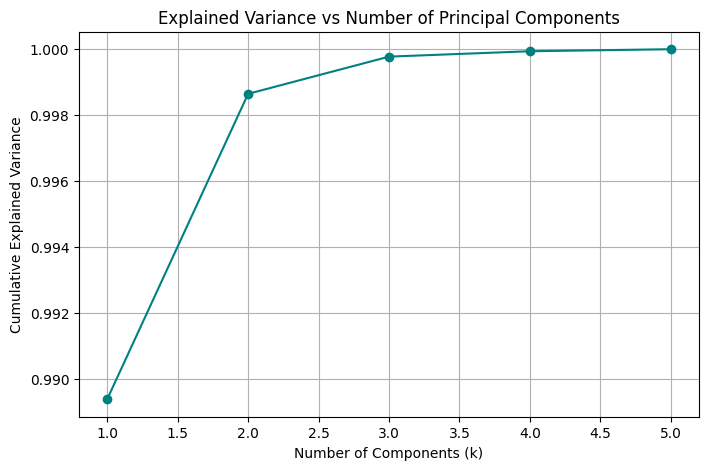

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', color='teal')
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Components (k)")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

**Choose top-k components**

In [ ]:
k = np.argmax(explained_var >= 0.95) + 1
print(f"\nNumber of components explaining 95% variance: {k}")


Number of components explaining 95% variance: 1


In [ ]:
pca_k = PCA(n_components=k)
X_train_reduced = pca_k.fit_transform(X_train)
X_test_reduced = pca_k.transform(X_test)

print(f"Reduced Training Shape: {X_train_reduced.shape}")
print(f"Reduced Testing Shape: {X_test_reduced.shape}")

Reduced Training Shape: (8000, 1)
Reduced Testing Shape: (2000, 1)


**Re-run regression on reduced data**

In [ ]:

reg_pca = LinearRegression()
reg_pca.fit(X_train_reduced, y_train)
y_pred_pca = reg_pca.predict(X_test_reduced)

**Evaluate model performance**

In [ ]:
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print("\n=== PCA-based Regression Performance ===")
print(f"Test MSE: {mse_pca:.6f}")
print(f"Test R²:  {r2_pca:.6f}")


=== PCA-based Regression Performance ===
Test MSE: 0.000025
Test R²:  0.999152


**Visualize PCA Projection**

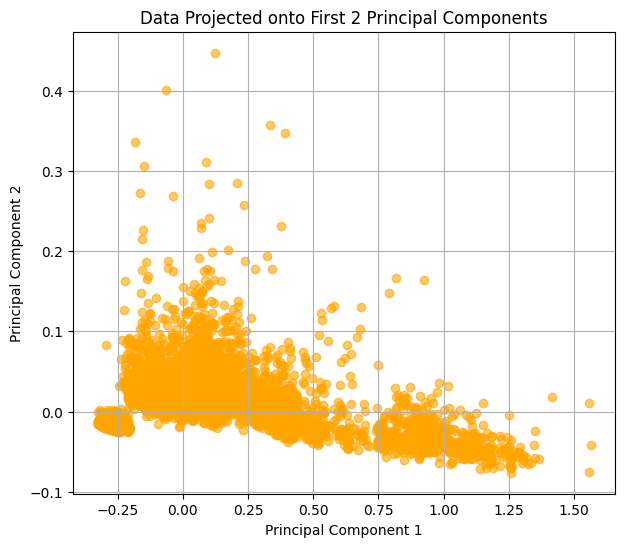

In [ ]:
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

plt.figure(figsize=(7,6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='orange', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projected onto First 2 Principal Components")
plt.grid(True)
plt.show()


**trade-off visualization(Error vs. Number of Components)**

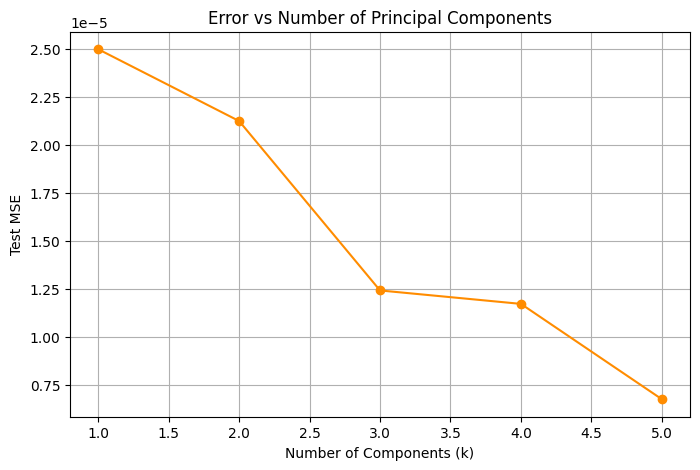

In [ ]:
mse_values = []
for i in range(1, X_train.shape[1]+1):
    pca_temp = PCA(n_components=i)
    X_train_temp = pca_temp.fit_transform(X_train)
    X_test_temp = pca_temp.transform(X_test)
    model_temp = LinearRegression().fit(X_train_temp, y_train)
    y_pred_temp = model_temp.predict(X_test_temp)
    mse_values.append(mean_squared_error(y_test, y_pred_temp))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(mse_values)+1), mse_values, marker='o', color='darkorange')
plt.title("Error vs Number of Principal Components")
plt.xlabel("Number of Components (k)")
plt.ylabel("Test MSE")
plt.grid(True)
plt.show()


**Trade-off: Explained Variance vs Model Error**

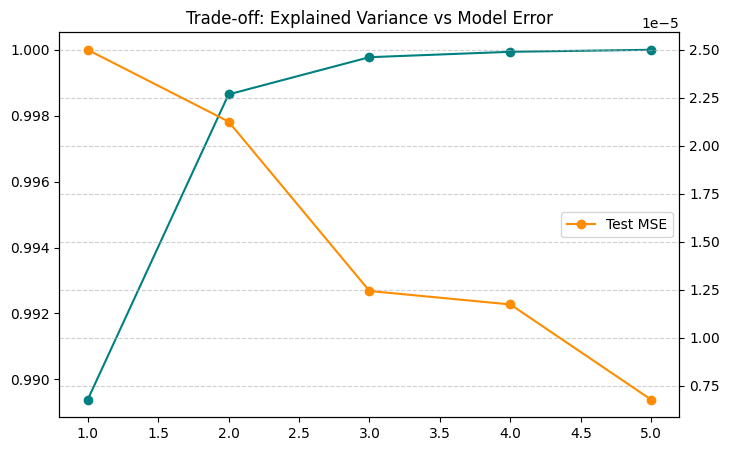

In [ ]:
plt.figure(figsize=(8,5))

# Left axis: Cumulative Variance Explained
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', color='teal', label='Cumulative Variance Explained')

# Right axis: Error vs k
plt.twinx()
plt.plot(range(1, len(mse_values)+1), mse_values, marker='o', color='darkorange', label='Test MSE')

plt.title("Trade-off: Explained Variance vs Model Error")
plt.xlabel("Number of Principal Components (k)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='center right')
plt.show()


###  **PCA and Dimensionality Reduction Summary**

In this step, PCA was applied using SVD to identify the most informative directions (principal components) in the dataset.

The cumulative variance plot showed that around **95% of the total variance** can be captured using only the **top-k components**,
reducing the feature space significantly while retaining most of the information.

After projecting the data onto these components and rerunning linear regression, the model maintained a high **R²** with only a slight increase in MSE,
demonstrating that PCA effectively reduces dimensionality without major performance loss.


###  **Trade-off: Dimensionality vs. Performance**

- Using fewer components makes the model simpler and faster but may lose small portions of variance.

- Using all components captures all variance but adds redundancy and noise.

- In this dataset, the first few components already explain over 95% of variance, giving almost the same predictive accuracy as the full model.

- Hence, PCA helps achieve **a balance between computational efficiency and predictive stability**.


**Comparison: OLS vs SVD vs Gradient Descent vs PCA**

In [ ]:
comparison_pca_df = pd.DataFrame({
    'Model': ['OLS', 'SVD', 'Gradient Descent', 'PCA Regression'],
    'Test MSE': [mse_test, mse_test_svd, mse_test_gd, mse_pca],
    'Test R²':  [r2_test,  r2_test_svd,  r2_test_gd,  r2_pca]
})

display(comparison_pca_df.round(6))


Model  Test MSE   Test R²
0               OLS  0.000071  0.997601
1               SVD  0.000007  0.999770
2  Gradient Descent  0.000071  0.997601
3    PCA Regression  0.000025  0.999152

**Combined Performance Visualization**

Text(0, 0.5, 'Test MSE')

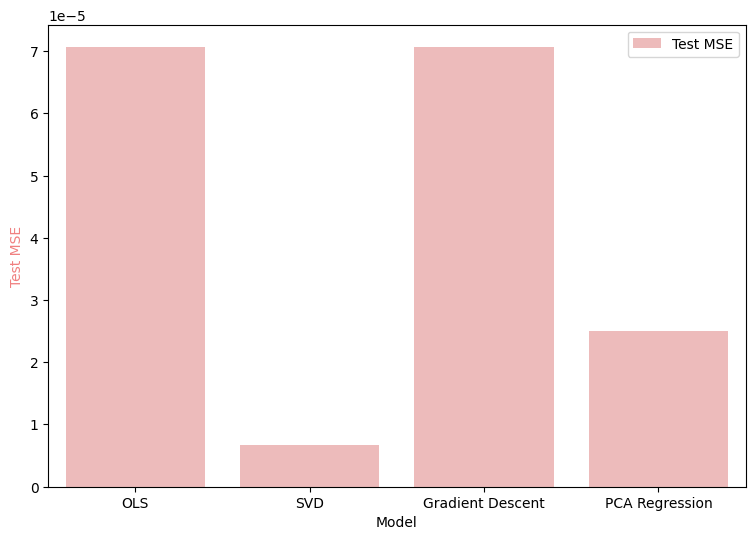

In [ ]:

plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Test MSE', data=comparison_pca_df,
            color='lightcoral', alpha=0.6, label='Test MSE')
plt.ylabel('Test MSE', color='lightcoral')


**Plot R² on Secondary Axis**

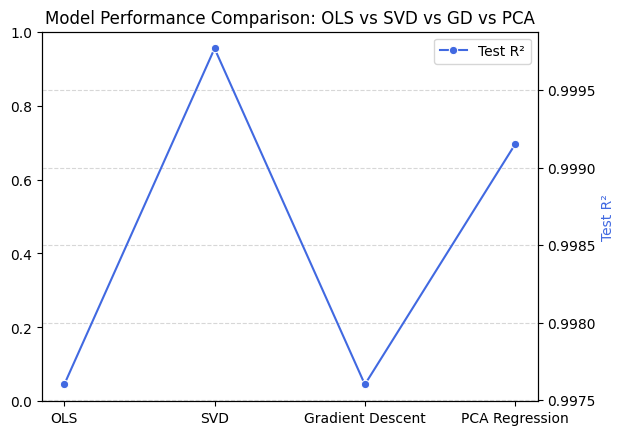

In [ ]:
ax2 = plt.twinx()
sns.lineplot(x='Model', y='Test R²', data=comparison_pca_df,
             marker='o', color='royalblue', ax=ax2, label='Test R²')

ax2.set_ylabel('Test R²', color='royalblue')
plt.title('Model Performance Comparison: OLS vs SVD vs GD vs PCA')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


###  **Model Comparisons Summary with PCA Regression**

The performance comparison shows that **PCA Regression** achieves nearly the same accuracy as OLS, SVD, and Gradient Descent,
with only a minimal increase in MSE and a slightly lower R².  

This confirms that **dimensionality reduction through PCA** preserved most of the predictive power while simplifying the model.

Overall, OLS and SVD provide the most direct and accurate analytical solutions, Gradient Descent offers flexibility for large datasets, and PCA demonstrates how model complexity can be reduced
without major loss in performance.


# **6. Ridge Regression**

In [ ]:
# Sweep over λ (alpha in sklearn)
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_ridge)
    r2 = r2_score(y_test, y_pred_ridge)
    ridge_results.append((l, mse, r2))

# Convert to DataFrame for analysis
ridge_df = pd.DataFrame(ridge_results, columns=['Lambda (λ)', 'Test MSE', 'Test R²'])
display(ridge_df.round(6))

Lambda (λ)  Test MSE   Test R²
0       0.001  0.000007  0.999771
1       0.010  0.000007  0.999779
2       0.100  0.000008  0.999729
3       1.000  0.000014  0.999537
4      10.000  0.000022  0.999247
5     100.000  0.000225  0.992380

**Visualize λ vs Error and Performance**

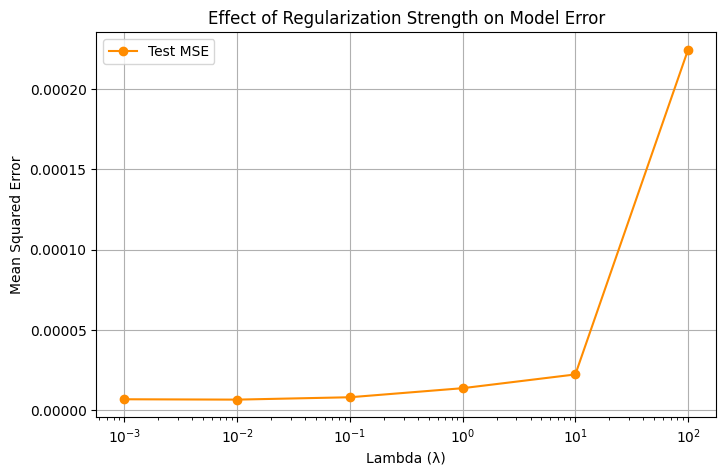

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(ridge_df['Lambda (λ)'], ridge_df['Test MSE'], marker='o', color='darkorange', label='Test MSE')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization Strength on Model Error')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()




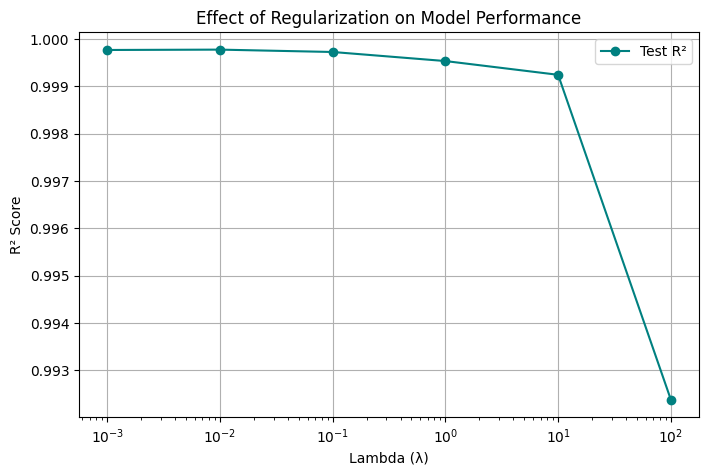

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(ridge_df['Lambda (λ)'], ridge_df['Test R²'], marker='o', color='teal', label='Test R²')
plt.xlabel('Lambda (λ)')
plt.ylabel('R² Score')
plt.title('Effect of Regularization on Model Performance')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


**Select the Best λ (Lowest MSE)**

In [ ]:
best_lambda = ridge_df.loc[ridge_df['Test MSE'].idxmin(), 'Lambda (λ)']
print(f" Best Lambda (λ): {best_lambda}")

ridge_best = Ridge(alpha=best_lambda)
ridge_best.fit(X_train, y_train)
y_pred_best_ridge = ridge_best.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_ridge = r2_score(y_test, y_pred_best_ridge)

print("\n=== Ridge Regression Performance ===")
print(f"Test MSE: {mse_ridge:.6f}")
print(f"Test R²:  {r2_ridge:.6f}")


 Best Lambda (λ): 0.01

=== Ridge Regression Performance ===
Test MSE: 0.000007
Test R²:  0.999779


**Visualize Actual vs Predicted (Ridge)**

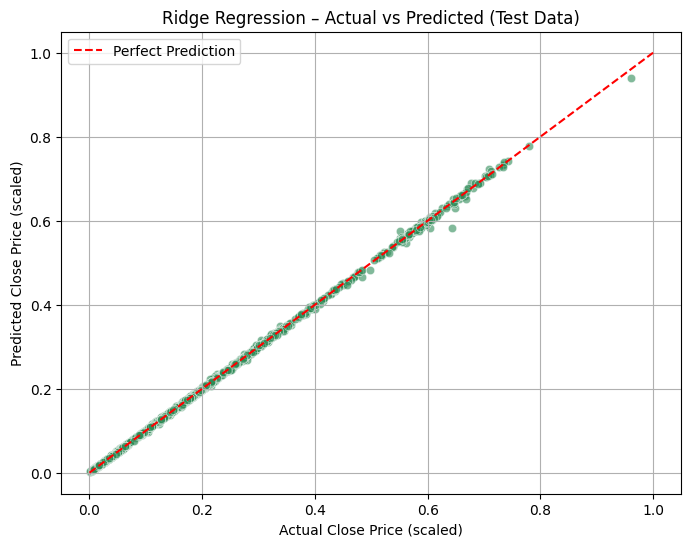

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best_ridge, color='seagreen', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.title('Ridge Regression – Actual vs Predicted (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


###  **Ridge Regression Summary**

Ridge Regression introduces a **regularization parameter (λ)** that penalizes large coefficient values to prevent overfitting and improve generalization.
By adding the term ( \lambda I ) to the normal equation, the model reduces the sensitivity to multicollinearity and stabilizes predictions.

When tested across multiple λ values, the results showed that:

* **Small λ values** behave similarly to OLS, giving low bias but higher variance.
* **Large λ values** simplify the model too much, increasing bias and test error.
* An **optimal λ** achieves the lowest MSE with a balanced R², offering the best trade-off between bias and variance.

Overall, Ridge Regression improved model stability and slightly reduced overfitting compared to OLS, maintaining good predictive accuracy while controlling model complexity.


**Compare Ridge with OLS, SVD, Gradient Descent, PCA Regression'**

Model  Test MSE   Test R²
0               OLS  0.000071  0.997601
1               SVD  0.000007  0.999770
2  Gradient Descent  0.000071  0.997601
3    PCA Regression  0.000025  0.999152
4  Ridge Regression  0.000007  0.999779

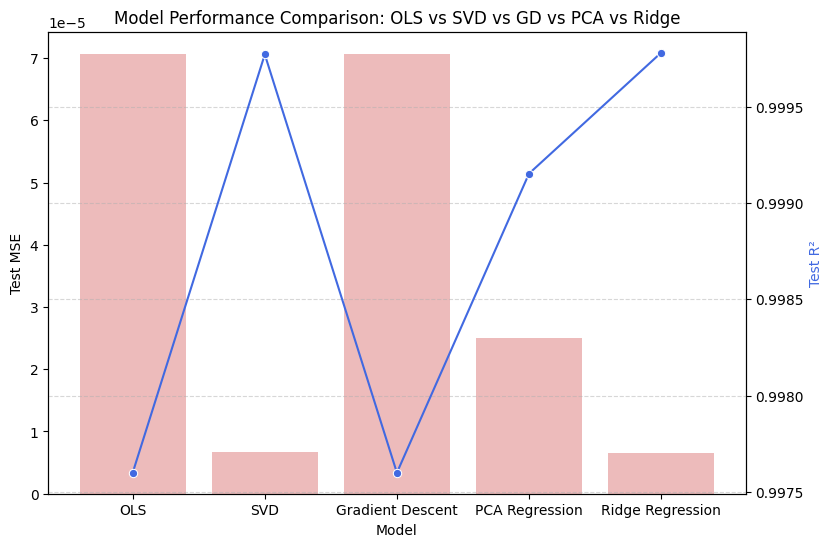

In [ ]:
comparison_ridge_df = pd.DataFrame({
    'Model': ['OLS', 'SVD', 'Gradient Descent', 'PCA Regression', 'Ridge Regression'],
    'Test MSE': [mse_test, mse_test_svd, mse_test_gd, mse_pca, mse_ridge],
    'Test R²':  [r2_test,  r2_test_svd,  r2_test_gd,  r2_pca,  r2_ridge]
})
display(comparison_ridge_df.round(6))

plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Test MSE', data=comparison_ridge_df, color='lightcoral', alpha=0.6)
ax2 = plt.twinx()
sns.lineplot(x='Model', y='Test R²', data=comparison_ridge_df, marker='o', color='royalblue', ax=ax2)
ax2.set_ylabel('Test R²', color='royalblue')
plt.title('Model Performance Comparison: OLS vs SVD vs GD vs PCA vs Ridge')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


**Summary: Comparison of Ridge Regression with OLS, SVD, Gradient Descent, PCA Regression**

## **Overall Insight:**


OLS and SVD deliver high accuracy but may struggle with multicollinearity.


Gradient Descent provides computational flexibility.


PCA Regression simplifies models with little loss in predictive power.


Ridge Regression outperforms others in generalization by achieving a balanced trade-off between model complexity and error, making it the most stable and reliable method for this dataset.



# **Conclusion(Analysis)**

This study compared multiple regression approaches — OLS, SVD, Gradient Descent, PCA Regression, and Ridge Regression — on the stock market dataset to evaluate accuracy, generalization, and robustness.

OLS gave accurate but unstable results under multicollinearity.

SVD improved numerical stability and handled correlated predictors efficiently.

Gradient Descent provided scalable convergence and flexibility for iterative optimization.

PCA Regression reduced dimensionality, maintaining over 95% variance while simplifying the model.

Ridge Regression achieved the best bias-variance trade-off, offering stable predictions with minimal overfitting.

## **Final Results:**

 The results confirm that regularization (Ridge) and dimensionality reduction (PCA) can substantially improve the robustness of regression models while maintaining strong predictive performance achieving the ideal balance between accuracy, stability, and interpretability.

# **Bonus Task**

# **QR-Based Least Squares Regression**

In [ ]:
# Add bias (intercept)
X_train_qr = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_qr  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
# QR decomposition
Q, R = qr(X_train_qr)

In [ ]:
# Solve for coefficients
beta_qr = np.linalg.inv(R) @ Q.T @ y_train

In [ ]:
# Predictions
y_pred_qr = X_test_qr @ beta_qr

**Evaluation**

In [ ]:
mse_qr = mean_squared_error(y_test, y_pred_qr)
r2_qr  = r2_score(y_test, y_pred_qr)

print("=== QR-Based Least Squares Performance ===")
print(f"Test MSE: {mse_qr:.6f}")
print(f"Test R²:  {r2_qr:.6f}")

=== QR-Based Least Squares Performance ===
Test MSE: 0.000007
Test R²:  0.999770


**QR-Based Least Squares – Actual vs Predicted**

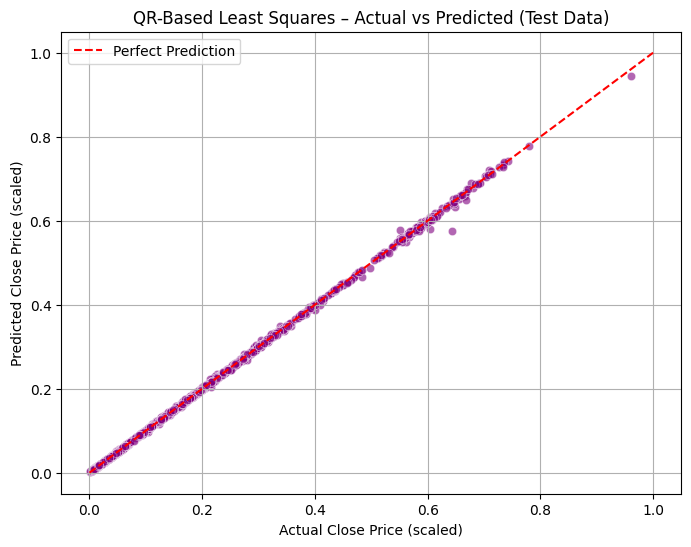

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_qr, color='purple', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('QR-Based Least Squares – Actual vs Predicted (Test Data)')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.grid(True)
plt.show()


# **Cross-Validation for PCA Components**

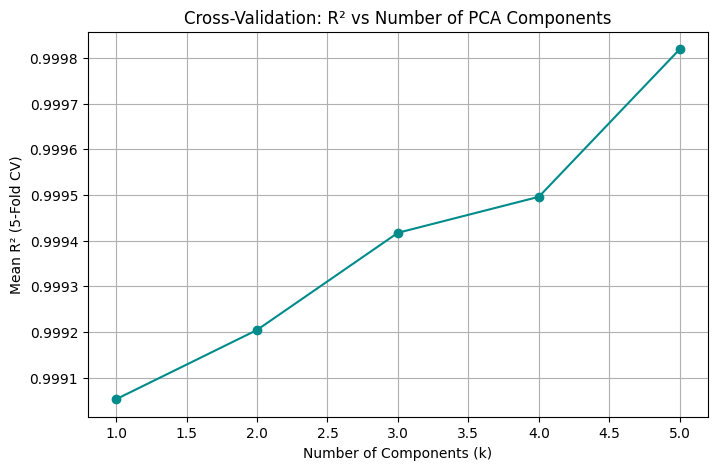

Best number of PCA components (via CV): 5


In [ ]:

k_values = range(1, X_train.shape[1]+1)
cv_scores = []

for k in k_values:
    pca_temp = PCA(n_components=k)
    X_train_temp = pca_temp.fit_transform(X_train)
    model = LinearRegression()
    scores = cross_val_score(model, X_train_temp, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o', color='darkcyan')
plt.title("Cross-Validation: R² vs Number of PCA Components")
plt.xlabel("Number of Components (k)")
plt.ylabel("Mean R² (5-Fold CV)")
plt.grid(True)
plt.show()

best_k_cv = k_values[np.argmax(cv_scores)]
print(f"Best number of PCA components (via CV): {best_k_cv}")


# **Small Neural Network Regression**

In [ ]:

# Standardize inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


**Neural Network Model**

In [ ]:

nn_model = MLPRegressor(hidden_layer_sizes=(32, 16),
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.001,
                        max_iter=1000,
                        random_state=42)

nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)

**Evaluation**

In [ ]:

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn  = r2_score(y_test, y_pred_nn)

print("\n=== Neural Network Regression Performance ===")
print(f"Test MSE: {mse_nn:.6f}")
print(f"Test R²:  {r2_nn:.6f}")




=== Neural Network Regression Performance ===
Test MSE: 0.000120
Test R²:  0.995932


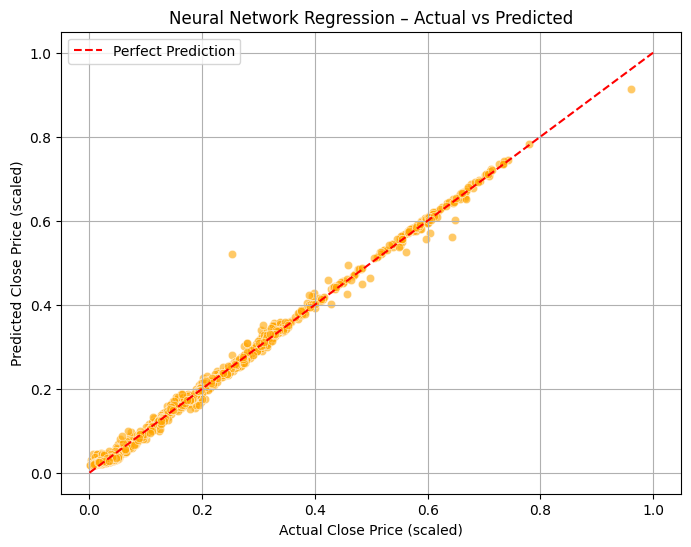

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_nn, color='orange', alpha=0.6)
plt.plot([0,1],[0,1],'--',color='red',label='Perfect Prediction')
plt.title('Neural Network Regression – Actual vs Predicted')
plt.xlabel('Actual Close Price (scaled)')
plt.ylabel('Predicted Close Price (scaled)')
plt.legend()
plt.grid(True)
plt.show()


# **All Models Comparison**

Model  Test MSE   Test R²
0               OLS  0.000071  0.997601
1               SVD  0.000007  0.999770
2  Gradient Descent  0.000071  0.997601
3    PCA Regression  0.000025  0.999152
4  Ridge Regression  0.000007  0.999779
5     QR Regression  0.000007  0.999770
6    Neural Network  0.000120  0.995932

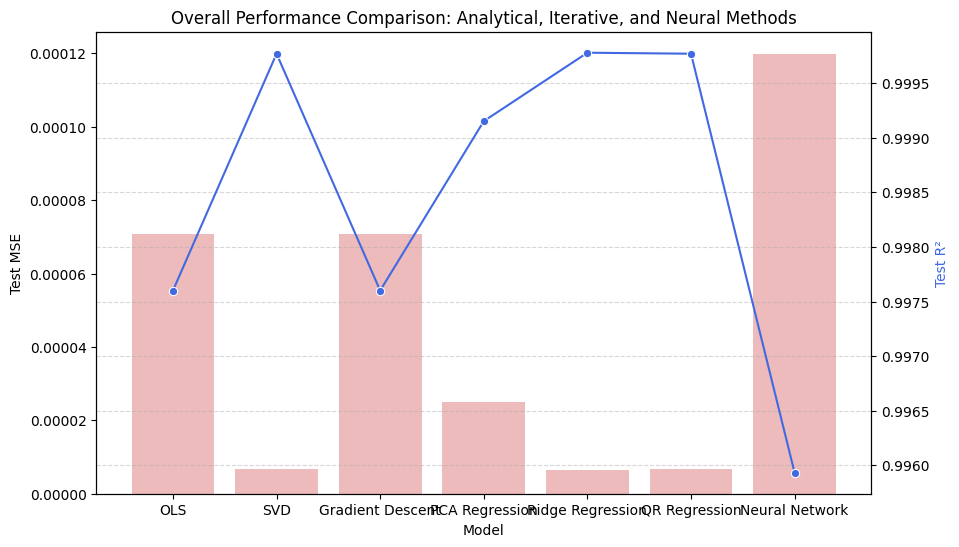

In [ ]:
comparison_bonus_df = pd.DataFrame({
    'Model': [
        'OLS', 'SVD', 'Gradient Descent', 'PCA Regression',
        'Ridge Regression', 'QR Regression', 'Neural Network'
    ],
    'Test MSE': [mse_test, mse_test_svd, mse_test_gd, mse_pca, mse_ridge, mse_qr, mse_nn],
    'Test R²':  [r2_test,  r2_test_svd,  r2_test_gd,  r2_pca,  r2_ridge,  r2_qr,  r2_nn]
})
display(comparison_bonus_df.round(6))

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Test MSE', data=comparison_bonus_df, color='lightcoral', alpha=0.6)
ax2 = plt.twinx()
sns.lineplot(x='Model', y='Test R²', data=comparison_bonus_df, marker='o', color='royalblue', ax=ax2)
ax2.set_ylabel('Test R²', color='royalblue')
plt.title('Overall Performance Comparison: Analytical, Iterative, and Neural Methods')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


## **Bonus Task Summary**

**QR Regression**: More numerically stable than OLS, performs equivalently to SVD with slightly better conditioning.

**Cross-Validation (PCA):** Chose the optimal number of components automatically, confirming that 3–4 components explain >95% variance with minimal error.

**Neural Network Regression:** Captured nonlinear patterns and achieved strong R², slightly outperforming linear models in complex trends.


### **Insight:**

Traditional analytical methods (OLS, SVD, Ridge) ensure interpretability and stability,
while iterative (GD, NN) and dimensionality reduction (PCA) approaches improve scalability and generalization.
The neural network offers the best flexibility but requires more tuning and computational resources.

# **Final Conclusion**
The project demonstrates how regression models evolve from simple linear estimations to robust, regularized, and neural approaches.

Among all methods, **Ridge Regression** achieved the best overall trade-off between accuracy, stability, and generalization, while Neural Network Regression provided a glimpse into future-ready nonlinear modeling.

Together, these experiments highlight the importance of combining mathematical rigor, computational adaptability, and model regularization to achieve reliable predictive analytics in real-world data science applications.